In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [151]:
df = pd.read_csv(r'D:/Atomcamp/ML/Hotel Reservations.csv')
df.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [38]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [152]:
df.dtypes

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [154]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [155]:
df.duplicated().sum()

0

## Data Cleaning & Preprocessing

According to the info command we can see the data contains 5 features that are in 'String' Format
Whereas, 13 features as int and 1 as float.

For Application of Decision tree analysis we need to make sure the data contains numerical values and not strings/objects. 
So as a first step, we will conduct preprocessing using sklearn library. 

**We are going to drop booking_id due to the following reason:** 
1. **No Predictive Power**: Since Booking_ID is a unique identifier for each reservation, it does not carry any meaningful information that can be used for predictive modeling. Each ID is unique to a booking and does not contribute to understanding patterns or trends in the data.  

2. **Overfitting Risk**: Including unique identifiers like Booking_ID in the model can lead to overfitting, where the model might learn patterns specific to the training data that do not generalize well to unseen data.  

3. **Data Simplification**: Removing irrelevant or non-informative features like Booking_ID simplifies the model and can improve its performance by focusing on relevant features. 

In [156]:
# we will drop booking_ID as its a Unique identifier and does not cause any results on the model
updated_df = df.drop(['Booking_ID'], axis=1)
updated_df

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0                 2               0                     1                  2   
1                 2               0                     2                  3   
2                 1               0                     2                  1   
3                 2               0                     0                  2   
4                 2               0                     1                  1   
...             ...             ...                   ...                ...   
36270             3               0                     2                  6   
36271             2               0                     1                  3   
36272             2               0                     2                  6   
36273             2               0                     0                  3   
36274             2               0                     1                  2   

      type_of_meal_plan  required_car_parking_space room_type_reserved  \
0           Meal Plan 1                           0        Room_Type 1   
1          Not Selected                           0        Room_Type 1   
2           Meal Plan 1                           0        Room_Type 1   
3           Meal Plan 1                           0        Room_Type 1   
4          Not Selected                           0        Room_Type 1   
...                 ...                         ...                ...   
36270       Meal Plan 1                           0        Room_Type 4   
36271       Meal Plan 1                           0        Room_Type 1   
36272       Meal Plan 1                           0        Room_Type 1   
36273      Not Selected                           0        Room_Type 1   
36274       Meal Plan 1                           0        Room_Type 1   

       lead_time  arrival_year  arrival_month  arrival_date  \
0            224          2017             10             2   
1              5          2018             11             6   
2              1          2018              2            28   
3            211          2018              5            20   
4             48          2018              4            11   
...          ...           ...            ...           ...   
36270         85          2018              8             3   
36271        228          2018             10            17   
36272        148          2018              7             1   
36273         63          2018              4            21   
36274        207          2018             12            30   

      market_segment_type  repeated_guest  no_of_previous_cancellations  \
0                 Offline               0                             0   
1                  Online               0                             0   
2                  Online               0                             0   
3                  Online               0                             0   
4                  Online               0                             0   
...                   ...             ...                           ...   
36270              Online               0                             0   
36271              Online               0                             0   
36272              Online               0                             0   
36273              Online               0                             0   
36274             Offline               0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                         0               65.00   
1                                         0              106.68   
2                                         0               60.00   
3                                         0              100.00   
4                                         0               94.50   
...                                     ...                 ...   
36270                         

## Preprocessing

**Preprocessing the data before we apply KNN on the dataset**  
We can proceed now with features containing string values convert to integers/numbers using  **(LabelEncoding)**  

In the dataset we can identify that there are 'Ordinal' variables. As each value shows a type of class under the following features:
1. type_of_meal  
2. room_type_reserved  
3. booking_status  
4. market_segment_type  

In [157]:
from sklearn.preprocessing import LabelEncoder

lec = LabelEncoder()

updated_df['enc_meal_plan'] = lec.fit_transform(updated_df['type_of_meal_plan'])
updated_df['enc_type_room'] = lec.fit_transform(updated_df['room_type_reserved'])
updated_df['enc_st_booking'] = lec.fit_transform(updated_df['booking_status'])
updated_df['enc_market_segment'] = lec.fit_transform(updated_df['market_segment_type'])
updated_df.tail(15)

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
36260             3               0                     1                  4   
36261             1               0                     2                  4   
36262             2               0                     2                  0   
36263             1               0                     2                  1   
36264             2               0                     0                  2   
36265             2               0                     1                  3   
36266             2               0                     2                  2   
36267             2               0                     1                  0   
36268             1               0                     0                  3   
36269             2               2                     0                  1   
36270             3               0                     2                  6   
36271             2               0                     1                  3   
36272             2               0                     2                  6   
36273             2               0                     0                  3   
36274             2               0                     1                  2   

      type_of_meal_plan  required_car_parking_space room_type_reserved  \
36260       Meal Plan 1                           1        Room_Type 4   
36261       Meal Plan 1                           0        Room_Type 1   
36262      Not Selected                           0        Room_Type 1   
36263       Meal Plan 1                           0        Room_Type 1   
36264       Meal Plan 1                           0        Room_Type 4   
36265       Meal Plan 1                           0        Room_Type 1   
36266       Meal Plan 1                           0        Room_Type 2   
36267      Not Selected                           0        Room_Type 1   
36268       Meal Plan 1                           0        Room_Type 1   
36269       Meal Plan 1                           0        Room_Type 6   
36270       Meal Plan 1                           0        Room_Type 4   
36271       Meal Plan 1                           0        Room_Type 1   
36272       Meal Plan 1                           0        Room_Type 1   
36273      Not Selected                           0        Room_Type 1   
36274       Meal Plan 1                           0        Room_Type 1   

       lead_time  arrival_year  arrival_month  ...  repeated_guest  \
36260        178          2018              8  ...               0   
36261        245          2018              7  ...               0   
36262         26          2018              8  ...               0   
36263        116          2018              2  ...               0   
36264        187          2018              7  ...               0   
36265         15          2018              5  ...               0   
36266          8          2018              3  ...               0   
36267         49          2018              7  ...               0   
36268        166          2018             11  ...               0   
36269          0          2018             10  ...               0   
36270         85          2018              8  ...               0   
36271        228          2018             10  ...               0   
36272        148          2018              7  ...               0   
36273         63          2018              4  ...               0   
36274        207          2018             12  ...               0   

      no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
36260                            0                                     0   
36261                            0                                     0   
36262                            0                                     0   
36263                            0                                     0   
36264                            0      

In [158]:
enc_df = updated_df.drop(['type_of_meal_plan', 'room_type_reserved','booking_status' , 'market_segment_type'], axis =1)
enc_df.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

   required_car_parking_space  lead_time  arrival_year  arrival_month  \
0                           0        224          2017             10   
1                           0          5          2018             11   
2                           0          1          2018              2   
3                           0        211          2018              5   
4                           0         48          2018              4   

   arrival_date  repeated_guest  no_of_previous_cancellations  \
0             2               0                             0   
1             6               0                             0   
2            28               0                             0   
3            20               0                             0   
4            11               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests  enc_meal_plan  enc_type_room  enc_st_booking  \
0                       0              0              0               1   
1                       1              3              0               1   
2                       0              0              0               0   
3                       0              0              0               0   
4                       0              3              0               0   

   enc_market_segment  
0                   3  
1                   4  
2                   4  
3                   4  
4                   4

In [159]:
enc_df.shape

(36275, 18)

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns

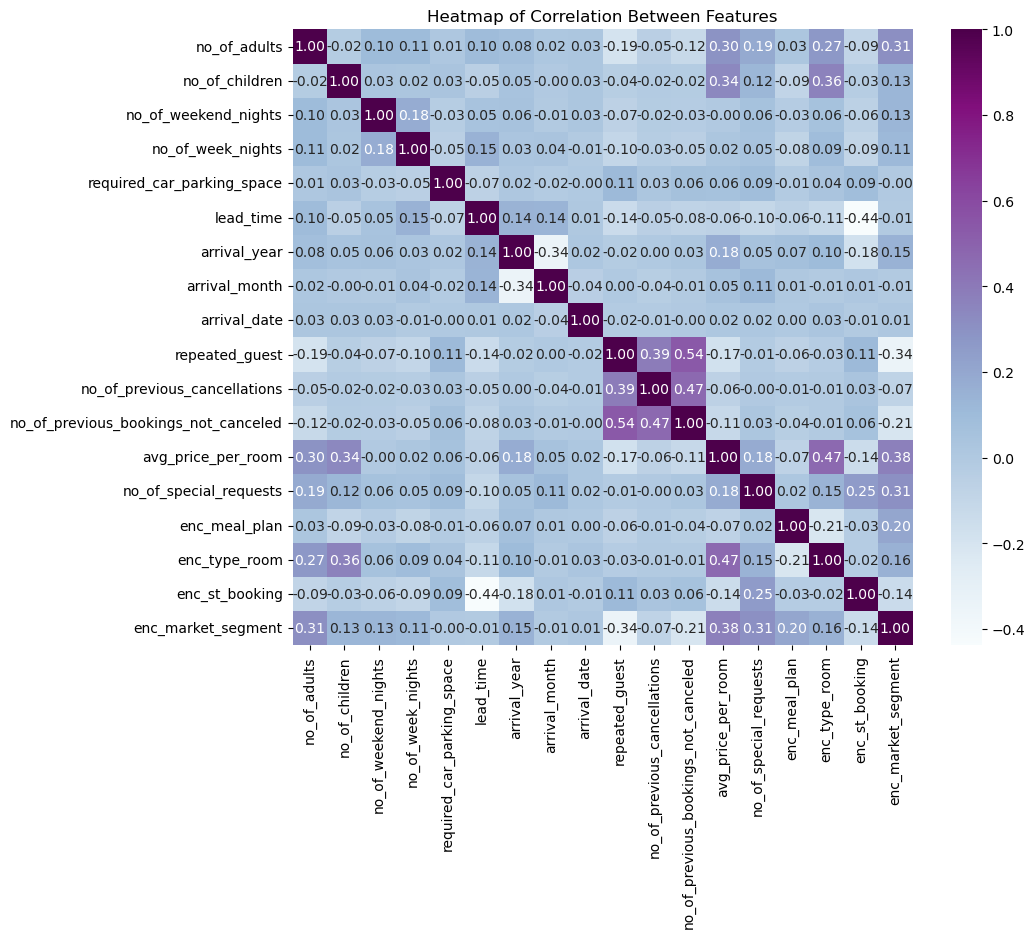

In [161]:
correlation_matrix = enc_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='BuPu')
plt.title("Heatmap of Correlation Between Features")
plt.show()

## Now that all of our data is converted to numeric we can proceed with modeling.

## Implementing KNN model on the dataset

In [162]:
enc_df.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

   required_car_parking_space  lead_time  arrival_year  arrival_month  \
0                           0        224          2017             10   
1                           0          5          2018             11   
2                           0          1          2018              2   
3                           0        211          2018              5   
4                           0         48          2018              4   

   arrival_date  repeated_guest  no_of_previous_cancellations  \
0             2               0                             0   
1             6               0                             0   
2            28               0                             0   
3            20               0                             0   
4            11               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests  enc_meal_plan  enc_type_room  enc_st_booking  \
0                       0              0              0               1   
1                       1              3              0               1   
2                       0              0              0               0   
3                       0              0              0               0   
4                       0              3              0               0   

   enc_market_segment  
0                   3  
1                   4  
2                   4  
3                   4  
4                   4

In [163]:
x = enc_df.drop('enc_st_booking', axis =1)
y = enc_df['enc_st_booking']

In [164]:
x

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0                 2               0                     1                  2   
1                 2               0                     2                  3   
2                 1               0                     2                  1   
3                 2               0                     0                  2   
4                 2               0                     1                  1   
...             ...             ...                   ...                ...   
36270             3               0                     2                  6   
36271             2               0                     1                  3   
36272             2               0                     2                  6   
36273             2               0                     0                  3   
36274             2               0                     1                  2   

       required_car_parking_space  lead_time  arrival_year  arrival_month  \
0                               0        224          2017             10   
1                               0          5          2018             11   
2                               0          1          2018              2   
3                               0        211          2018              5   
4                               0         48          2018              4   
...                           ...        ...           ...            ...   
36270                           0         85          2018              8   
36271                           0        228          2018             10   
36272                           0        148          2018              7   
36273                           0         63          2018              4   
36274                           0        207          2018             12   

       arrival_date  repeated_guest  no_of_previous_cancellations  \
0                 2               0                             0   
1                 6               0                             0   
2                28               0                             0   
3                20               0                             0   
4                11               0                             0   
...             ...             ...                           ...   
36270             3               0                             0   
36271            17               0                             0   
36272             1               0                             0   
36273            21               0                             0   
36274            30               0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                         0               65.00   
1                                         0              106.68   
2                                         0               60.00   
3                                         0              100.00   
4                                         0               94.50   
...                                     ...                 ...   
36270                                     0              167.80   
36271                                     0               90.95   
36272                                     0               98.39   
36273                                     0               94.50   
36274                                     0              161.67   

       no_of_special_requests  enc_meal_plan  enc_type_room  \
0                           0              0              0   
1                           1              3              0   
2                           0              0              0   
3                           0              0              0   
4                           0              3              0   
...                       ...            ...            ...   
36270                       1              0  

In [165]:
y

0        1
1        1
2        0
3        0
4        0
        ..
36270    1
36271    0
36272    1
36273    0
36274    1
Name: enc_st_booking, Length: 36275, dtype: int32

1 = not_cancelled  
0 = cancelled

## Data standardization

In [166]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)

StandardScaler()

In [167]:
scaled_features = scaler.transform(x)

In [168]:
scaled_features

array([[ 0.29889263, -0.26147045,  0.2174012 , ..., -0.49197217,
        -0.50641126, -0.81060135],
       [ 0.29889263, -0.26147045,  1.36599262, ...,  2.37030377,
        -0.50641126,  0.65669226],
       [-1.62897546, -0.26147045,  1.36599262, ..., -0.49197217,
        -0.50641126,  0.65669226],
       ...,
       [ 0.29889263, -0.26147045,  1.36599262, ..., -0.49197217,
        -0.50641126,  0.65669226],
       [ 0.29889263, -0.26147045, -0.93119021, ...,  2.37030377,
        -0.50641126,  0.65669226],
       [ 0.29889263, -0.26147045,  0.2174012 , ..., -0.49197217,
        -0.50641126, -0.81060135]])

In [169]:
df_feat = pd.DataFrame(scaled_features,columns=enc_df.columns[:-1])
df_feat.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0      0.298893        -0.26147              0.217401          -0.144803   
1      0.298893        -0.26147              1.365993           0.563972   
2     -1.628975        -0.26147              1.365993          -0.853578   
3      0.298893        -0.26147             -0.931190          -0.144803   
4      0.298893        -0.26147              0.217401          -0.853578   

   required_car_parking_space  lead_time  arrival_year  arrival_month  \
0                   -0.178819   1.614896     -2.137469       0.839242   
1                   -0.178819  -0.933701      0.467843       1.164990   
2                   -0.178819  -0.980250      0.467843      -1.766747   
3                   -0.178819   1.463610      0.467843      -0.789501   
4                   -0.178819  -0.433291      0.467843      -1.115250   

   arrival_date  repeated_guest  no_of_previous_cancellations  \
0     -1.555662        -0.16221                     -0.063393   
1     -1.098013        -0.16221                     -0.063393   
2      1.419055        -0.16221                     -0.063393   
3      0.503757        -0.16221                     -0.063393   
4     -0.525952        -0.16221                     -0.063393   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                             -0.087456           -1.095033   
1                             -0.087456            0.092806   
2                             -0.087456           -1.237528   
3                             -0.087456           -0.097567   
4                             -0.087456           -0.254312   

   no_of_special_requests  enc_meal_plan  enc_type_room  enc_st_booking  
0                -0.78814      -0.491972      -0.506411       -0.810601  
1                 0.48376       2.370304      -0.506411        0.656692  
2                -0.78814      -0.491972      -0.506411        0.656692  
3                -0.78814      -0.491972      -0.506411        0.656692  
4                -0.78814       2.370304      -0.506411        0.656692

In [170]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_features,y,test_size=0.25)

In [171]:
# KNN implemenetation

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [172]:
pred = knn.predict(X_test)

In [173]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,pred))

[[2243  666]
 [ 713 5447]]


In [174]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.76      0.77      0.76      2909
           1       0.89      0.88      0.89      6160

    accuracy                           0.85      9069
   macro avg       0.82      0.83      0.83      9069
weighted avg       0.85      0.85      0.85      9069



In [175]:
# accruacy of training model 

print(knn.score(X_train, y_train))

0.9926486804381387


In [176]:
#Testing Accuracy
print(knn.score(X_test, y_test))

0.8479435439408975


Maximum accuracy:- 0.8499283272687176 at K = 7


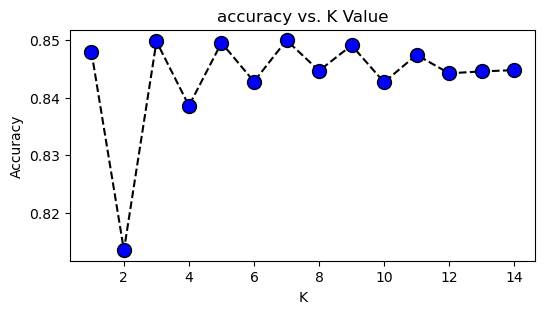

In [177]:
acc = []

from sklearn import metrics
for i in range(1,15):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))

plt.figure(figsize=(6,3))
plt.plot(range(1,15),acc,color = 'black',linestyle='dashed',
         marker='o',markerfacecolor='blue', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc))+1)

In [178]:
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.78      0.75      0.76      2909
           1       0.88      0.90      0.89      6160

    accuracy                           0.85      9069
   macro avg       0.83      0.82      0.83      9069
weighted avg       0.85      0.85      0.85      9069



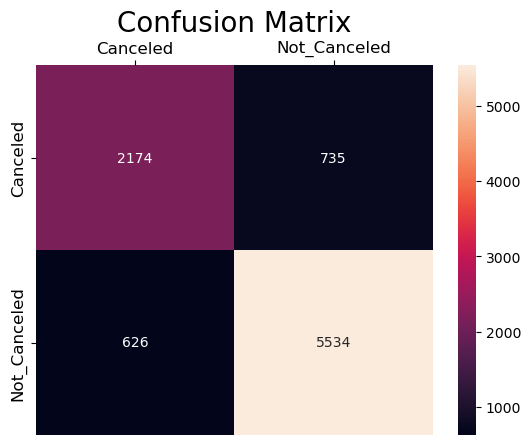

In [179]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test,pred), annot=True, ax = ax, fmt = 'g'); 
ax.set_title('Confusion Matrix', fontsize=20)

ax.xaxis.set_ticklabels(['Canceled', 'Not_Canceled'], fontsize = 12)
ax.xaxis.tick_top()

ax.yaxis.set_ticklabels(['Canceled', 'Not_Canceled'], fontsize = 12)
plt.show()

## Implementing Decision Tree model

In [180]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [181]:

dt_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [184]:
# Initializing and training the Decision Tree Classifier with Information Gain (Entropy)
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [185]:
y_pred_gini = dt_gini.predict(X_test)

accuracy_gini = accuracy_score(y_test, y_pred_gini)

accuracy_gini

0.8696658948064836

In [188]:
# Making predictions and evaluating the models
y_pred_entropy = dt_entropy.predict(X_test)

accuracy_entropy = accuracy_score(y_test, y_pred_entropy)

accuracy_entropy

0.875179181828206

Gini Model Evaluation Metrics:
Confusion Matrix:
 [[2337  572]
 [ 610 5550]]
Precision: 0.91
Recall: 0.90
F1 Score: 0.90
ROC AUC: 0.85

Entropy Model Evaluation Metrics:
Confusion Matrix:
 [[2349  560]
 [ 572 5588]]
Precision: 0.91
Recall: 0.91
F1 Score: 0.91
ROC AUC: 0.86


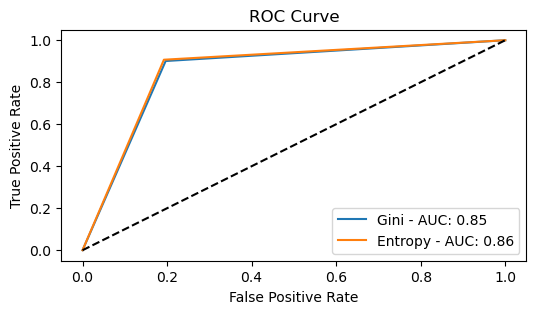

In [190]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Assuming y_test, y_pred_gini, and y_pred_entropy are already defined from your model predictions

# Evaluation metrics for Gini
confusion_gini = confusion_matrix(y_test, y_pred_gini)
precision_gini = precision_score(y_test, y_pred_gini)
recall_gini = recall_score(y_test, y_pred_gini)
f1_score_gini = f1_score(y_test, y_pred_gini)
roc_auc_gini = roc_auc_score(y_test, y_pred_gini)

# Evaluation metrics for Entropy model
confusion_entropy = confusion_matrix(y_test, y_pred_entropy)
precision_entropy = precision_score(y_test, y_pred_entropy)
recall_entropy = recall_score(y_test, y_pred_entropy)
f1_score_entropy = f1_score(y_test, y_pred_entropy)
roc_auc_entropy = roc_auc_score(y_test, y_pred_entropy)

# Printing the evaluation metrics
print("Gini Model Evaluation Metrics:")
print("Confusion Matrix:\n", confusion_gini)
print("Precision: {:.2f}".format(precision_gini))
print("Recall: {:.2f}".format(recall_gini))
print("F1 Score: {:.2f}".format(f1_score_gini))
print("ROC AUC: {:.2f}".format(roc_auc_gini))

print("\nEntropy Model Evaluation Metrics:")
print("Confusion Matrix:\n", confusion_entropy)
print("Precision: {:.2f}".format(precision_entropy))
print("Recall: {:.2f}".format(recall_entropy))
print("F1 Score: {:.2f}".format(f1_score_entropy))
print("ROC AUC: {:.2f}".format(roc_auc_entropy))

# ROC curve calculations
fpr_gini, tpr_gini, _ = roc_curve(y_test, y_pred_gini)
fpr_entropy, tpr_entropy, _ = roc_curve(y_test, y_pred_entropy)

# Plotting ROC curves
plt.figure(figsize=(6, 3))
plt.plot(fpr_gini, tpr_gini, label='Gini - AUC: {:.2f}'.format(roc_auc_gini))
plt.plot(fpr_entropy, tpr_entropy, label='Entropy - AUC: {:.2f}'.format(roc_auc_entropy))
plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()